### Chapter 8: Trees & Random Forests

Practical task: Titanic example

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [139]:
input_train = pd.read_csv('input/titanic-train.csv')
input_test = pd.read_csv('input/titanic-test.csv')

input_train = input_train.drop(['name'], axis=1)
input_train = pd.get_dummies(input_train, columns=['sex'], drop_first=True)
input_train = pd.get_dummies(input_train)

input_test = input_test.drop('name', axis=1)
input_test = pd.get_dummies(input_test, columns=['sex'], drop_first=True)
input_test = pd.get_dummies(input_test)

input_train.head()

,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_C,embarked_Q,embarked_S
0,3,25.0,0,0,7.0500,0,True,False,False,True
1,3,28.0,0,0,22.5250,0,True,False,False,True
2,3,26.0,0,0,7.8958,0,True,False,False,True
3,3,18.0,0,0,8.3000,0,True,False,False,True
4,3,18.0,0,0,7.2292,1,False,True,False,False


In [140]:
# X_train, X_test, y_train, y_test = train_test_split(input_train.drop('survived', axis=1), input_train['survived'], test_size=0.2, random_state=42)

X_train = input_train.drop('survived', axis=1)
y_train = input_train['survived']

X_test = input_test.drop('survived', axis=1)
y_test = input_test['survived']

Train a decision tree and find best parameters by tuning (used grid search)

In [141]:
tree = DecisionTreeClassifier(min_samples_split=8, min_samples_leaf=6, random_state=42)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)

print(f'Accuracy: {str(round(tree_acc*100, 2))}%')


Accuracy: 78.43%


Visualize Decision Tree

In [142]:
# plt.figure(figsize=(20, 10))
# plot_tree(tree, filled=True, feature_names=X_train.columns)
# plt.show()

<Axes: >

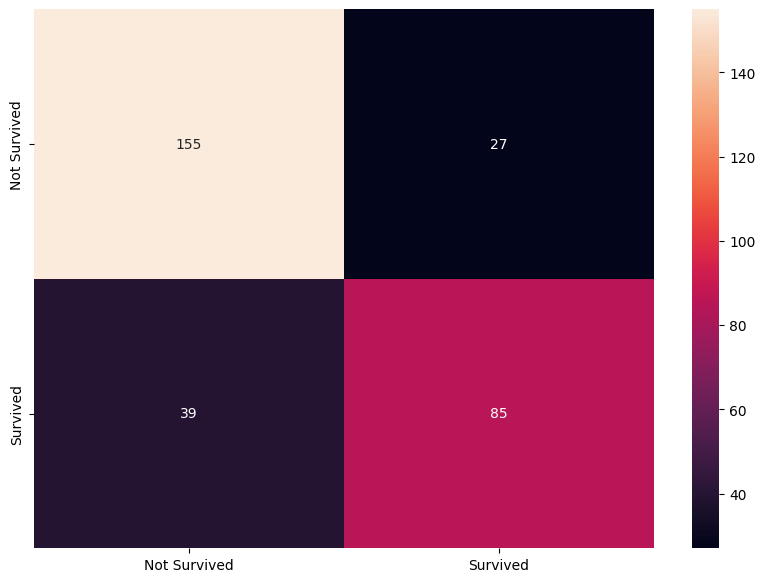

In [143]:
tree_conf_m = confusion_matrix(y_test, tree_pred)

tree_cnf_df = pd.DataFrame(tree_conf_m, index=['Not Survived', 'Survived'], columns=['Not Survived', 'Survived'])
plt.figure(figsize=(10, 7))
sn.heatmap(tree_cnf_df, annot=True, fmt='g')

In [144]:
forest = RandomForestClassifier(n_estimators=32, random_state=42)
forest.fit(X_train, y_train)

forest_pred = forest.predict(X_test)
forest_acc = accuracy_score(y_test, forest_pred)

print(f'Accuracy: {str(round(forest_acc*100, 2))}%')

Accuracy: 77.12%


<Axes: >

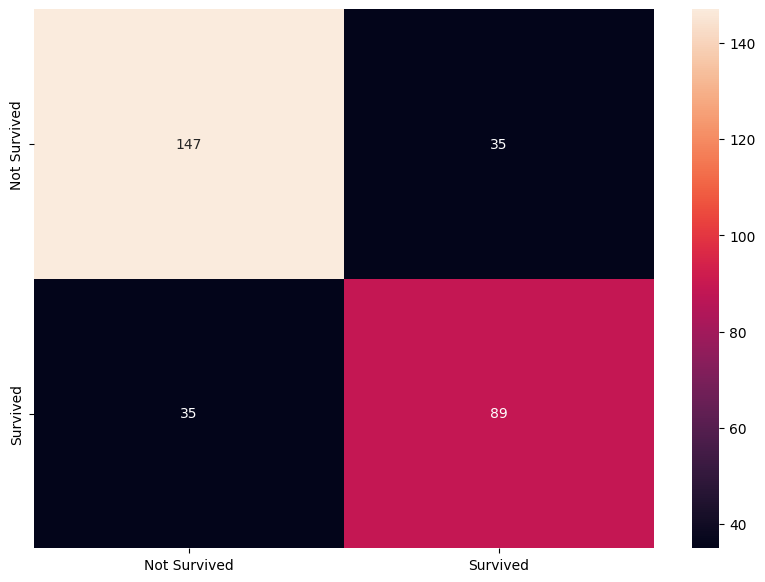

In [145]:
forest_conf_m = confusion_matrix(y_test, forest_pred)

forest_cnf_df = pd.DataFrame(forest_conf_m, index=['Not Survived', 'Survived'], columns=['Not Survived', 'Survived'])
plt.figure(figsize=(10, 7))
sn.heatmap(forest_cnf_df, annot=True, fmt='g')